In [ ]:
!pip install wordcloud
!pip install gensim==3.8.3
!pip install pyLDAvis
!pip install wikipedia

In [21]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['us', 're'])
# load spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
#wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import wikipedia

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
corpus = wikipedia.summary("Wikipedia")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


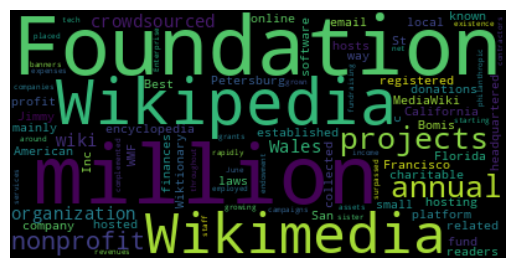

In [24]:
wordcloud = WordCloud().generate(corpus)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Step 1: Tokenization

In [28]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))
data_words = list(sent_to_words([corpus]))
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=10)
trigram = gensim.models.Phrases(bigram[data_words], threshold=8)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# print a sample
print(trigram_mod[bigram_mod[data_words[0]]])

['the', 'wikimedia', 'foundation', 'inc', 'wmf', 'is', 'an', 'american', 'nonprofit', 'organization', 'headquartered', 'in', 'san', 'francisco', 'california', 'and', 'registered', 'as', 'charitable', 'foundation', 'under', 'local', 'laws', 'best', 'known', 'as', 'the', 'hosting', 'platform', 'for', 'wikipedia', 'crowdsourced', 'online', 'encyclopedia', 'it', 'also', 'hosts', 'other', 'related', 'projects', 'and', 'mediawiki', 'wiki', 'software', 'the', 'wikimedia', 'foundation', 'was', 'established', 'in', 'in', 'st', 'petersburg', 'florida', 'by', 'jimmy', 'wales', 'as', 'nonprofit', 'way', 'to', 'fund', 'wikipedia', 'wiktionary', 'and', 'other', 'crowdsourced', 'wiki', 'projects', 'that', 'had', 'until', 'then', 'been', 'hosted', 'by', 'bomis', 'wales', 'for', 'profit', 'company', 'the', 'foundation', 'finances', 'itself', 'mainly', 'through', 'millions', 'of', 'small', 'donations', 'from', 'wikipedia', 'readers', 'collected', 'through', 'email', 'campaigns', 'and', 'annual', 'fundra

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Step 2: Stop words, n-grams, and lemmatization

In [29]:
# Define functions for stopwords, n-grams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# call the functions created above
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['headquarter', 'register', 'charitable', 'foundation', 'local', 'law', 'well', 'know', 'host', 'platform', 'crowdsource', 'online', 'encyclopedia', 'also', 'host', 'related', 'project', 'software', 'establish', 'nonprofit', 'way', 'fund', 'wiktionary', 'crowdsource', 'wiki', 'project', 'host', 'profit', 'company', 'foundation', 'finance', 'mainly', 'million', 'small', 'donation', 'wikipedia', 'reader', 'collect', 'email', 'campaign', 'annual', 'fundraising', 'banner', 'place', 'sister', 'project', 'complement', 'grant', 'philanthropic', 'organization', 'tech', 'company', 'start', 'service', 'income', 'enterprise', 'foundation', 'grow', 'rapidly', 'existence', 'employ', 'staff', 'contractor', 'annual', 'revenue', 'annual', 'expense', 'net', 'asset', 'grow', 'endowment', 'surpass']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Step 3: Create dictionary and corpus


In [ ]:
 # Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# view corpus in human readable format
[[(id2word[id], freq) for id, freq in cp] for cp in corpus]

#Step 4: Build the LDA topic model

In [34]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=2, # change this number and re-run as needed
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.017*"project" + 0.017*"annual" + 0.017*"host" + 0.017*"foundation" + '
  '0.017*"company" + 0.016*"crowdsource" + 0.016*"grow" + 0.016*"platform" + '
  '0.016*"employ" + 0.016*"endowment"'),
 (1,
  '0.034*"foundation" + 0.034*"host" + 0.034*"annual" + 0.034*"project" + '
  '0.024*"grow" + 0.024*"crowdsource" + 0.024*"company" + '
  '0.015*"philanthropic" + 0.015*"fundraising" + 0.015*"tech"')]


#Step 5: Compute model performance metrics

In [35]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
# change value of num_topics and re-run

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -4.681326650910908

Coherence Score:  0.9999999999999998


#Step 6: Visualization

In [36]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis
# change num_topics and re-run until intertopic distance chart looks good


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.004309  0.0       1        1  98.472425
0     -0.004309  0.0       2        1   1.527575, topic_info=           Term      Freq     Total Category  logprob  loglift
42      project  2.000000  2.000000  Default  30.0000  30.0000
1        annual  2.000000  2.000000  Default  29.0000  29.0000
27         host  2.000000  2.000000  Default  28.0000  28.0000
21   foundation  2.000000  2.000000  Default  27.0000  27.0000
7       company  1.000000  1.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
27         host  0.018336  2.440418   Topic2  -4.0940  -0.7095
7       company  0.018185  1.747625   Topic2  -4.1023  -0.3839
21   foundation  0.018261  2.441830   Topic2  -4.0982  -0.7143
10  crowdsource  0.018123  1.748773   Topic2  -4.1057  -0.3880
25         grow  0.018112  1.748979   Topic2  -4.1063  -0.3887

[97 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         1  0.947197           also
1         1  0.819672         annual
2         1  0.948139          asset
3         1  0.947228         banner
4         1  0.947261       campaign
5         1  0.948049     charitable
6         1  0.946884        collect
7         1  1.144410        company
8         1  0.948133     complement
9         1  0.947234     contractor
10        1  1.143659    crowdsource
11        1  0.946874       donation
12        1  0.947667          email
13        1  0.948307         employ
14        1  0.947592   encyclopedia
15        1  0.948237      endowment
16        1  0.947375     enterprise
17        1  0.947313      establish
18        1  0.947173      existence
19        1  0.947506        expense
20        1  0.947954        finance
21        1  0.819058     foundation
22        1  0.947148           fund
23        1  0.946783    fundraising
24        1  0.947901          grant
25        1  1.143524           grow
26        1  0.947352    headquarter
27        1  0.819532           host
28        1  0.947293         income
29        1  0.947266           know
30        1  0.947684            law
31        1  0.947431          local
32        1  0.947972         mainly
33        1  0.947212        million
34        1  0.947310            net
35        1  0.947417      nonprofit
36        1  0.948206         online
37        1  0.947736   organization
38        1  0.946555  philanthropic
39        1  0.947719          place
40        1  0.948492       platform
41        1  0.947485         profit
42        1  0.819678        project
43        1  0.947078        rapidly
44        1  0.947351         reader
45        1  0.947959       register
46        1  0.947699        related
47        1  0.947063        revenue
48        1  0.947200        service
49        1  0.947279         sister
50        1  0.947816          small
51        1  0.947561       software
52        1  0.947081          staff
54        1  0.947125        surpass
55        1  0.946850           tech
56        1  0.947964            way
57        1  0.947232           well
58        1  0.947640           wiki
59        1  0.947373      wikipedia
60        1  0.948029     wiktionary, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [37]:
# Retrain LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, # change this number and re-run as needed
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Regenerate model performance metrics
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
# Recereate topic visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -5.055972745642066

Coherence Score:  0.9999999999999998


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
2     -0.009747  0.0       1        1  99.816343
1      0.002147  0.0       2        1   0.063165
4      0.002636  0.0       3        1   0.041206
0      0.002412  0.0       4        1   0.040485
3      0.002552  0.0       5        1   0.038800, topic_info=           Term      Freq     Total Category  logprob  loglift
27         host  2.000000  2.000000  Default  30.0000  30.0000
42      project  2.000000  2.000000  Default  29.0000  29.0000
1        annual  2.000000  2.000000  Default  28.0000  28.0000
21   foundation  2.000000  2.000000  Default  27.0000  27.0000
7       company  1.000000  1.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
27         host  0.000463  2.730350   Topic5  -4.1010  -0.8288
25         grow  0.000460  1.878170   Topic5  -4.1054  -0.4590
1        annual  0.000462  2.732039   Topic5  -4.1018  -0.8301
21   foundation  0.000461  2.733320   Topic5  -4.1047  -0.8336
10  crowdsource  0.000460  1.878924   Topic5  -4.1060  -0.4600

[224 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.973746        also
1         1  1.098081      annual
2         1  0.974253       asset
3         1  0.973386      banner
4         1  0.974391    campaign
...     ...       ...         ...
56        1  0.973572         way
57        1  0.974278        well
58        1  0.973773        wiki
59        1  0.974414   wikipedia
60        1  0.973859  wiktionary

[61 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4])